In [40]:
#merging vacant data with prevoiously merged dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [16]:
df=pd.read_csv("mergeddf1.csv")
df

,property_key,contractDate,year,month,quarter,Data Series,price,area,floorRange,propertyType,...,tenure,street,project,marketSegment,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,RentIndex
0,p-c1ce31019,3/1/2018,2018,3,1,2018 1Q,1850000.0,102.0,36-40,Apartment,...,99 yrs lease commencing from 2005,SHENTON WAY,ONE SHENTON,CCR,1.279295,103.850553,0.0,3.0,13.0,102.8
1,p-a7fd7deb5,3/1/2018,2018,3,1,2018 1Q,1030000.0,121.0,5-Jan,Condominium,...,Freehold,FLORA ROAD,AVILA GARDENS,OCR,1.360158,103.965165,4.0,1.0,0.0,102.8
2,p-2a981615e,3/1/2018,2018,3,1,2018 1Q,4300000.0,300.0,5-Jan,Condominium,...,Freehold,MOUNT SINAI RISE,BEAVERTON COURT,CCR,1.316080,103.776088,4.0,0.0,1.0,102.8
3,p-2bb570b5d,3/1/2018,2018,3,1,2018 1Q,1400888.0,107.0,5-Jan,Condominium,...,Freehold,FOO KIM LIN ROAD,TROPIKA EAST,OCR,1.328997,103.906865,6.0,0.0,2.0,102.8
4,p-4ccd6e1db,3/1/2018,2018,3,1,2018 1Q,725000.0,54.0,10-Jun,Condominium,...,99 yrs lease commencing from 2009,BEDOK RESERVOIR ROAD,WATERFRONT GOLD,OCR,1.338566,103.928528,4.0,0.0,1.0,102.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,p-bd1f74cf3,12/1/2022,2022,12,4,2022 4Q,4630000.0,305.0,10-Jun,Condominium,...,99 yrs lease commencing from 2007,COVE DRIVE,TURQUOISE,CCR,1.242964,103.837106,0.0,0.0,0.0,148.1
62945,p-bf14f1df6,12/1/2022,2022,12,4,2022 4Q,1500000.0,80.0,15-Nov,Apartment,...,99 yrs lease commencing from 2002,MARINA BOULEVARD,THE SAIL @ MARINA BAY,CCR,1.280769,103.852659,0.0,1.0,11.0,148.1
62946,p-d32689720,12/1/2022,2022,12,4,2022 4Q,1460000.0,65.0,5-Jan,Condominium,...,99 yrs lease commencing from 2013,MOUNT SOPHIA,SOPHIA HILLS,CCR,1.300691,103.848129,3.0,3.0,11.0,148.1
62947,p-1475e4b20,12/1/2022,2022,12,4,2022 4Q,1390000.0,80.0,15-Nov,Condominium,...,99 yrs lease commencing from 2011,WEST COAST CRESCENT,SEAHILL,OCR,1.298847,103.764918,2.0,1.0,0.0,148.1


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Box Plot'}, xlabel='price'>

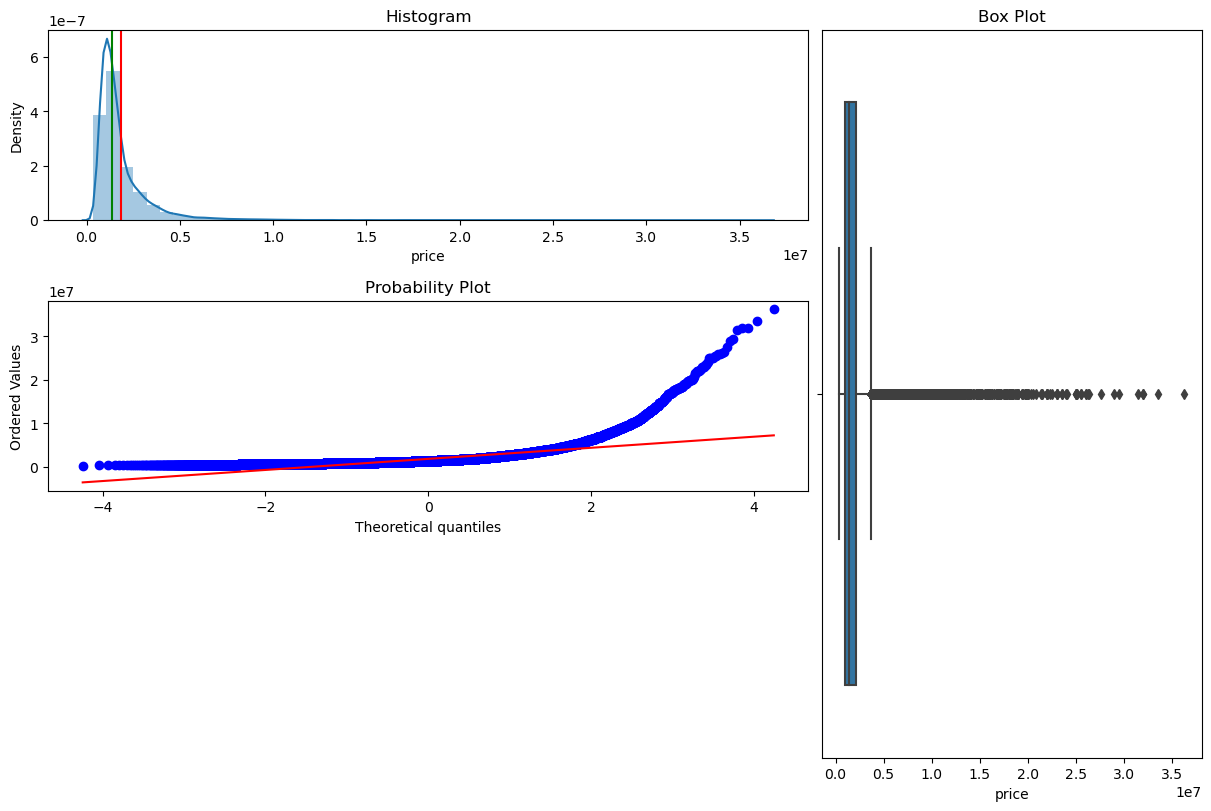

In [17]:
fig = plt.figure(constrained_layout = True, figsize = (12, 8))
grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
    
sns.distplot(df.loc[:, 'price'], norm_hist = True, ax = ax1)
plt.axvline(x = df['price'].mean(), c = 'red')
plt.axvline(x = df['price'].median(), c = 'green')
    
ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('QQ_plot')
stats.probplot(df.loc[:,'price'], plot = ax2)

 ## Customizing the Box Plot. 
ax3 = fig.add_subplot(grid[:, 2])
 ## Set title. 
ax3.set_title('Box Plot')
sns.boxplot(df.loc[:,'price'], orient = 'v', ax = ax3 )

Red line in histogram indicates the mean of the Price and the Green line indicates the median
From the above plots, we can observe that the Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

### Year + price +area

year


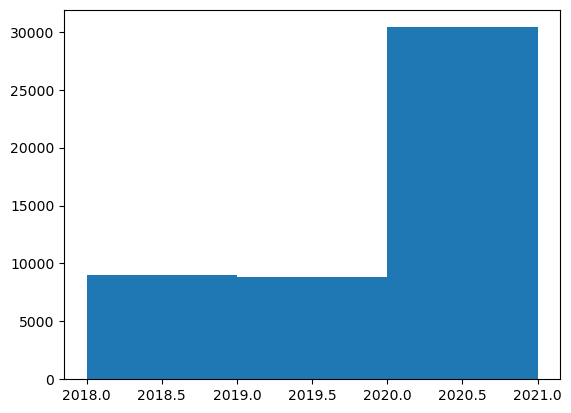

TypeError: 'float' object cannot be interpreted as an integer

In [18]:
for col in ['year','price','area']:
    plt.hist(df[col], bins = range(min(df[col]), max(df[col]),1))
    print(col)
    plt.show();

### Relationship between Area and Price

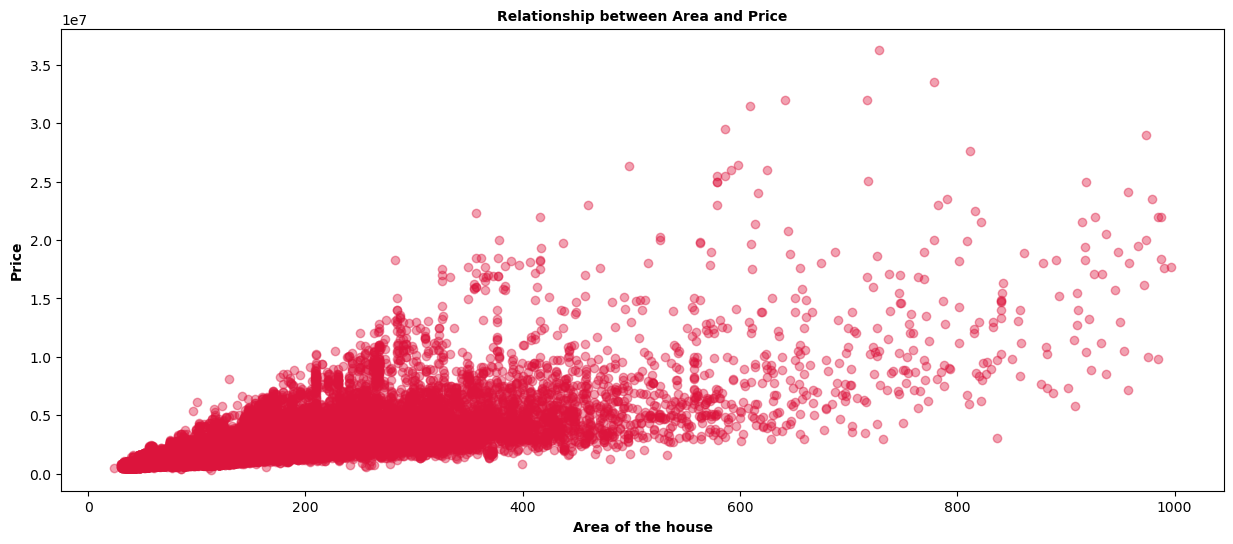

In [19]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'area', y = 'price', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Area and Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Price', weight = 'bold')
plt.show()

<AxesSubplot:xlabel='area', ylabel='price'>

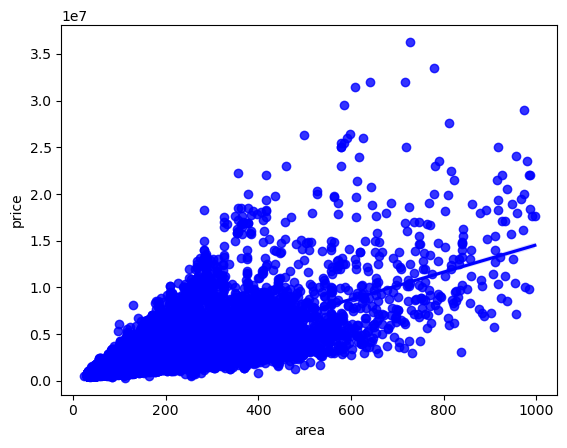

In [20]:
sns.regplot(x = 'area', y = 'price', data = df, color='blue')

### Notice that Price increase with area

### Property type and Price

<AxesSubplot:xlabel='propertyType', ylabel='price'>

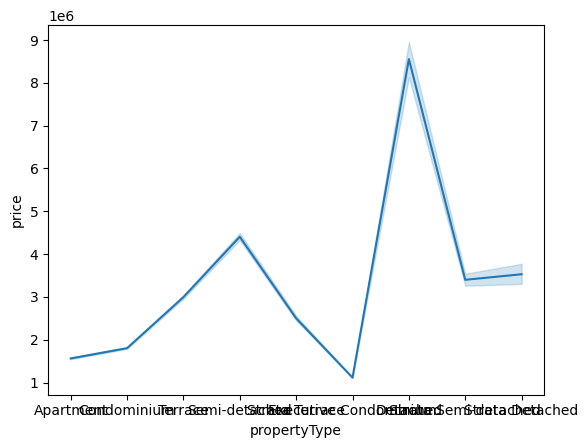

In [21]:
sns.lineplot(data = df, x= 'propertyType', y = 'price')

### merge data cpi,vacant and main data

In [22]:
cpi=pd.read_csv('cpi.csv')
vacant=pd.read_csv('vacant.csv')

In [23]:
df1 = pd.merge(df,vacant, how ="inner")
df1.head()
df1.shape

(62949, 24)

In [24]:
fulldf= pd.merge(df1,cpi,how='inner')
fulldf

,property_key,contractDate,year,month,quarter,Data Series,price,area,floorRange,propertyType,...,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,RentIndex,Available,Vacant,Data Series.1,CPI
0,p-c1ce31019,3/1/2018,2018,3,1,2018 1Q,1850000.0,102.0,36-40,Apartment,...,1.279295,103.850553,0.0,3.0,13.0,102.8,30153,3950,2021 May,101.883
1,p-a7fd7deb5,3/1/2018,2018,3,1,2018 1Q,1030000.0,121.0,5-Jan,Condominium,...,1.360158,103.965165,4.0,1.0,0.0,102.8,30153,3950,2021 May,101.883
2,p-2a981615e,3/1/2018,2018,3,1,2018 1Q,4300000.0,300.0,5-Jan,Condominium,...,1.316080,103.776088,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883
3,p-2bb570b5d,3/1/2018,2018,3,1,2018 1Q,1400888.0,107.0,5-Jan,Condominium,...,1.328997,103.906865,6.0,0.0,2.0,102.8,30153,3950,2021 May,101.883
4,p-4ccd6e1db,3/1/2018,2018,3,1,2018 1Q,725000.0,54.0,10-Jun,Condominium,...,1.338566,103.928528,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,p-bd1f74cf3,12/1/2022,2022,12,4,2022 4Q,4630000.0,305.0,10-Jun,Condominium,...,1.242964,103.837106,0.0,0.0,0.0,148.1,34084,524,2022 Dec,111.186
62945,p-bf14f1df6,12/1/2022,2022,12,4,2022 4Q,1500000.0,80.0,15-Nov,Apartment,...,1.280769,103.852659,0.0,1.0,11.0,148.1,34084,524,2022 Dec,111.186
62946,p-d32689720,12/1/2022,2022,12,4,2022 4Q,1460000.0,65.0,5-Jan,Condominium,...,1.300691,103.848129,3.0,3.0,11.0,148.1,34084,524,2022 Dec,111.186
62947,p-1475e4b20,12/1/2022,2022,12,4,2022 4Q,1390000.0,80.0,15-Nov,Condominium,...,1.298847,103.764918,2.0,1.0,0.0,148.1,34084,524,2022 Dec,111.186


In [11]:
fulldf

,property_key,contractDate,year,month,quarter,Data Series,price,area,floorRange,propertyType,...,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,RentIndex,Available,Vacant,Data Series.1,CPI
0,p-c1ce31019,3/1/2018,2018,3,1,2018 1Q,1850000.0,102.0,36-40,Apartment,...,1.279295,103.850553,0.0,3.0,13.0,102.8,30153,3950,2021 May,101.883
1,p-a7fd7deb5,3/1/2018,2018,3,1,2018 1Q,1030000.0,121.0,5-Jan,Condominium,...,1.360158,103.965165,4.0,1.0,0.0,102.8,30153,3950,2021 May,101.883
2,p-2a981615e,3/1/2018,2018,3,1,2018 1Q,4300000.0,300.0,5-Jan,Condominium,...,1.316080,103.776088,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883
3,p-2bb570b5d,3/1/2018,2018,3,1,2018 1Q,1400888.0,107.0,5-Jan,Condominium,...,1.328997,103.906865,6.0,0.0,2.0,102.8,30153,3950,2021 May,101.883
4,p-4ccd6e1db,3/1/2018,2018,3,1,2018 1Q,725000.0,54.0,10-Jun,Condominium,...,1.338566,103.928528,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,p-bd1f74cf3,12/1/2022,2022,12,4,2022 4Q,4630000.0,305.0,10-Jun,Condominium,...,1.242964,103.837106,0.0,0.0,0.0,148.1,34084,524,2022 Dec,111.186
62945,p-bf14f1df6,12/1/2022,2022,12,4,2022 4Q,1500000.0,80.0,15-Nov,Apartment,...,1.280769,103.852659,0.0,1.0,11.0,148.1,34084,524,2022 Dec,111.186
62946,p-d32689720,12/1/2022,2022,12,4,2022 4Q,1460000.0,65.0,5-Jan,Condominium,...,1.300691,103.848129,3.0,3.0,11.0,148.1,34084,524,2022 Dec,111.186
62947,p-1475e4b20,12/1/2022,2022,12,4,2022 4Q,1390000.0,80.0,15-Nov,Condominium,...,1.298847,103.764918,2.0,1.0,0.0,148.1,34084,524,2022 Dec,111.186


In [12]:
table=pd.pivot_table(data=df,index='propertyType',values='price',aggfunc=sum)
ndf=table.head(20)

In [ ]:
ndf

In [ ]:
ex=[0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
c=['r','g','y','b']
plt.pie(ndf['price'],labels=ndf.index,explode=ex,colors=c,radius=1,startangle=45,textprops={'fontsize':5})
plt.xticks(rotation=70)
plt.xlabel('propertyType')
plt.ylabel('price')
plt.title('Most popular used')
plt.show();

In [11]:
def horizontal_plot(data, column_name, color, plot_title):

    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1368\1036572791.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)


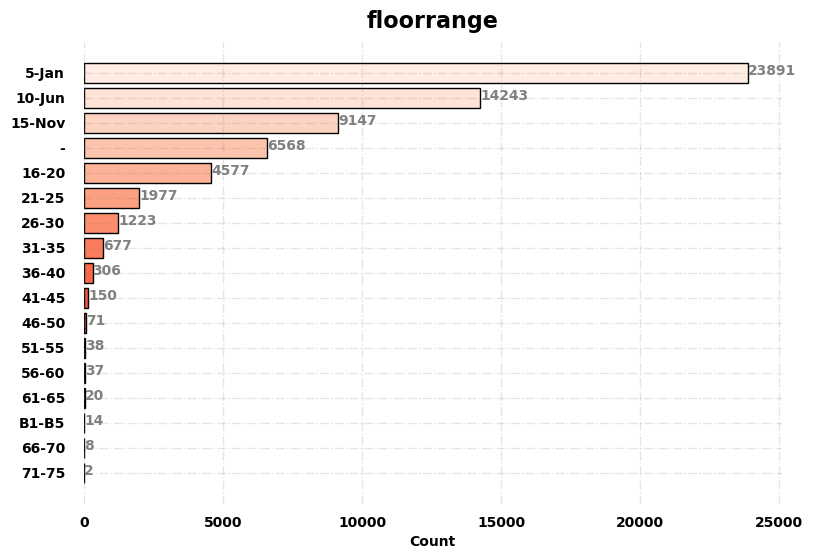

In [12]:
horizontal_plot(df, 'floorRange','Reds', 'floorrange');

### Property Type vs quarter 

In [13]:
table=pd.pivot_table(data=df,index='propertyType',values='quarter',aggfunc=sum)
ndf=table.head(20)

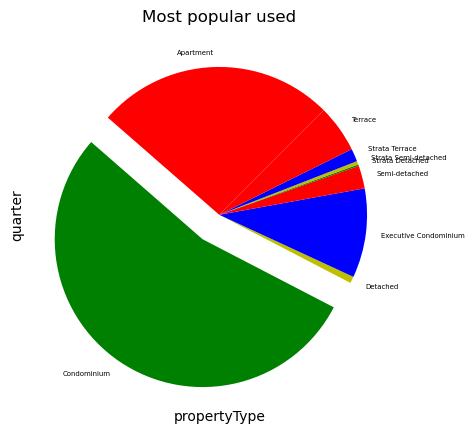

In [14]:
ex=[0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
c=['r','g','y','b']
plt.pie(ndf['quarter'],labels=ndf.index,explode=ex,colors=c,radius=1,startangle=45,textprops={'fontsize':5})
plt.xticks(rotation=70)
plt.xlabel('propertyType')
plt.ylabel('quarter')
plt.title('Most popular used')
plt.show();

### number of quarter in condominium is high so the price of condominium is high 

### Distribution of 'num_schools_1km', 'num_supermarkets_500m', 'num_mrt_stations_500m'

num_schools_1km


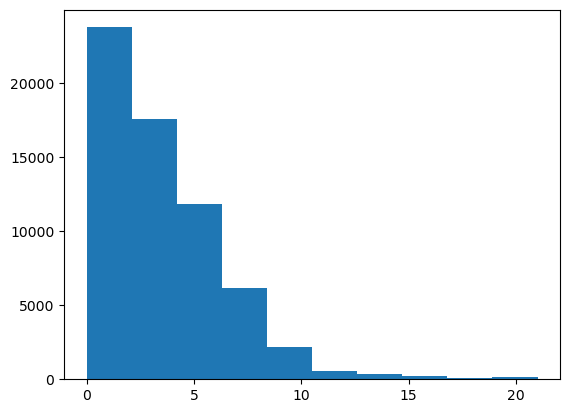

num_supermarkets_500m


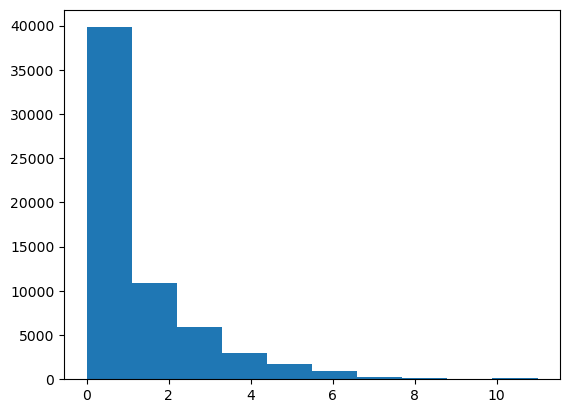

num_mrt_stations_500m


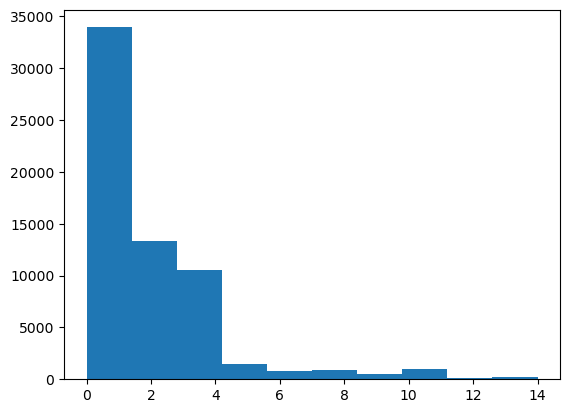

In [15]:
for col in ['num_schools_1km', 'num_supermarkets_500m', 'num_mrt_stations_500m']:
    pl = plt.hist(df[col])
    print(col)
    plt.show()

### Count No of quarter

<AxesSubplot:xlabel='quarter', ylabel='count'>

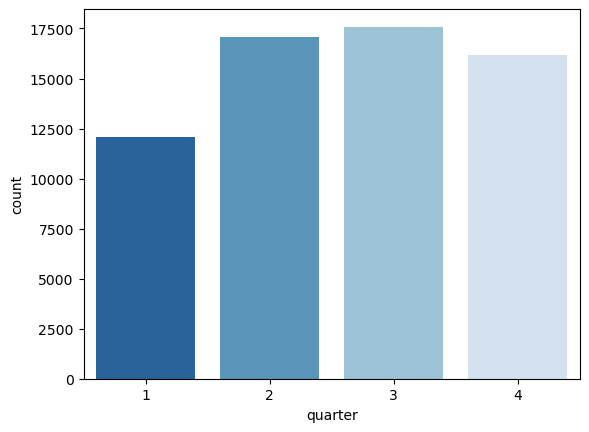

In [16]:

sns.countplot(x="quarter", palette="Blues_r", data=df)



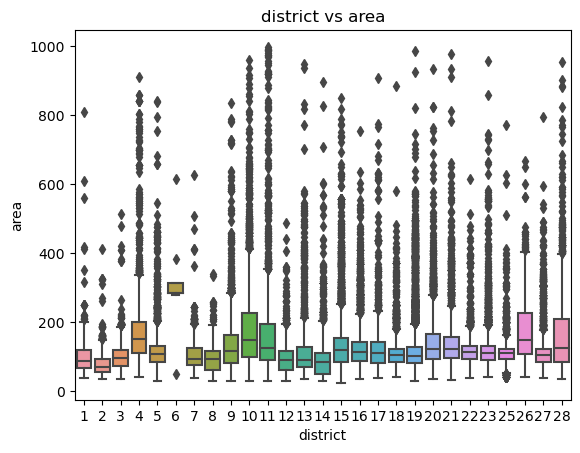

In [17]:
bxplt = sns.boxplot(x='district',y='area', data=df)
plt.title('district vs area')
plt.show()

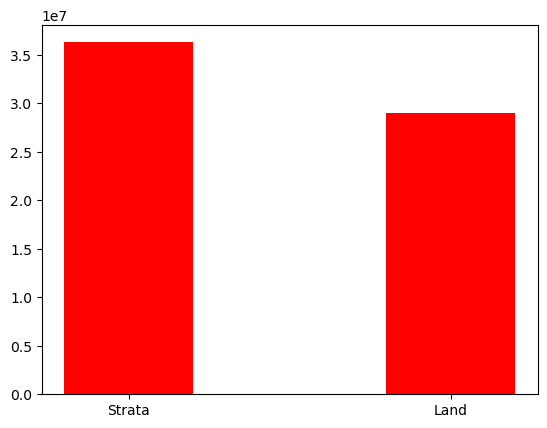

In [18]:
plt.bar(df['typeOfArea'],df['price'],color='red',width=.4);

### price of house in strata is high

In [19]:
table=pd.pivot_table(data=df,index='typeOfArea',values='price',aggfunc=sum)
ndf=table.head(20)
ndf

,price
typeOfArea,
Land,2.062724e+10
Strata,9.705592e+10


### Why in stratra price is high?

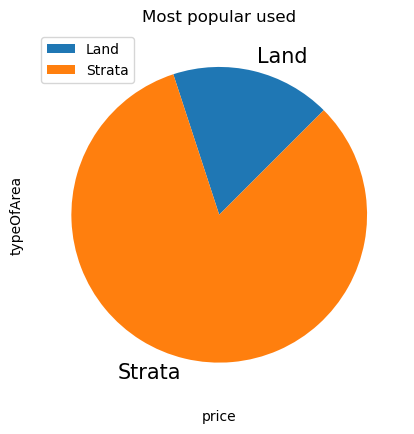

In [20]:
plt.pie(ndf['price'],labels=ndf.index,radius=1,startangle=45,textprops={'fontsize':15})
plt.xticks(rotation=70)
plt.xlabel('price')
plt.ylabel('typeOfArea')
plt.title('Most popular used')
plt.legend()
plt.show();

<AxesSubplot:title={'center':'num_supermarkets_500m'}, xlabel='num_supermarkets_500m', ylabel='count'>

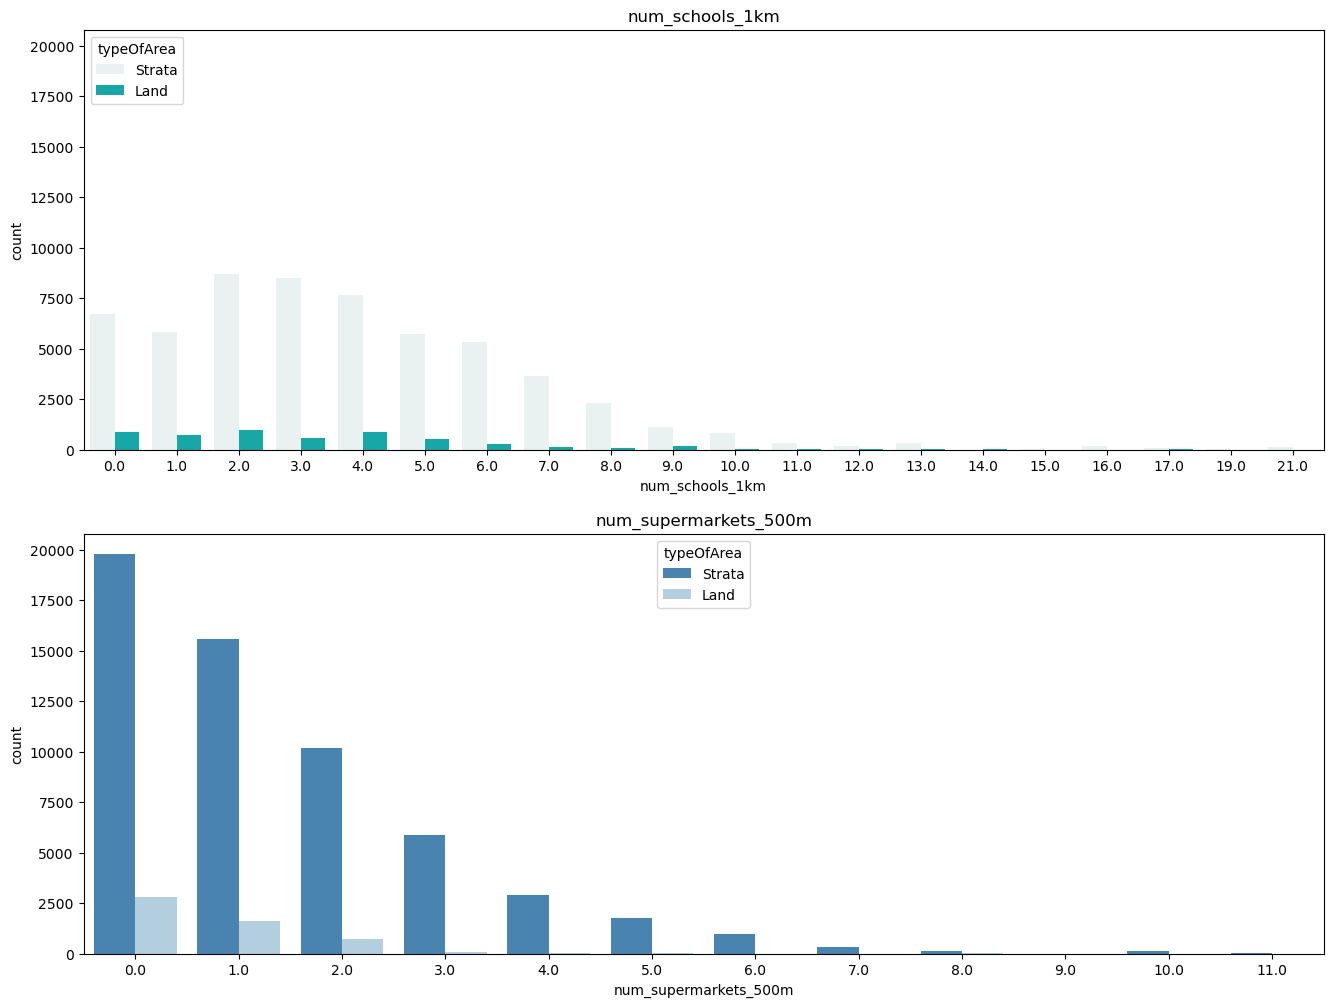

In [21]:
fig, ax=plt.subplots(2,1, sharey=True, figsize=(16,12))
ax[0].set_title('num_schools_1km')
sns.countplot(x='num_schools_1km', data=df,hue='typeOfArea', color='c', ax=ax[0])
ax[1].set_title('num_supermarkets_500m')
sns.countplot(x='num_supermarkets_500m',hue='typeOfArea', data=df, palette='Blues_r',ax=ax[1])

<AxesSubplot:xlabel='num_mrt_stations_500m', ylabel='count'>

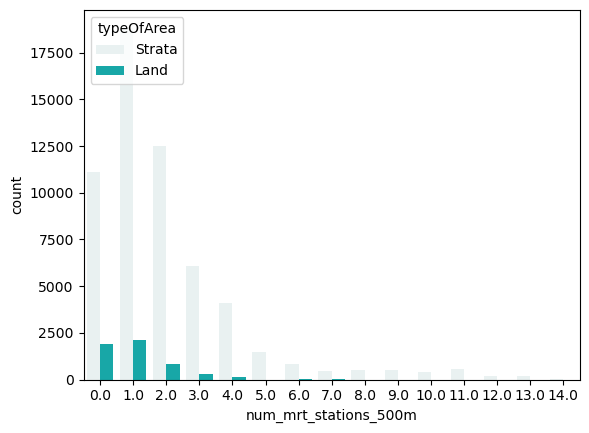

In [22]:
sns.countplot(x='num_mrt_stations_500m', data=df,hue='typeOfArea', color='c')

### Number of school within 1 km ,number of supermarket within 500m and number of market stations within 500 m is high in Strata so the price of house is so high

### Relation between cpi and marketsegment

In [31]:
x=fulldf.groupby('marketSegment')
mean_of_cpi=fulldf.groupby('marketSegment')[['CPI']].mean()
mean_of_cpi.to_csv('mean_of_cpi.csv')

In [32]:
mean_of_cpi = pd.read_csv('mean_of_cpi.csv')

<AxesSubplot:xlabel='marketSegment', ylabel='CPI'>

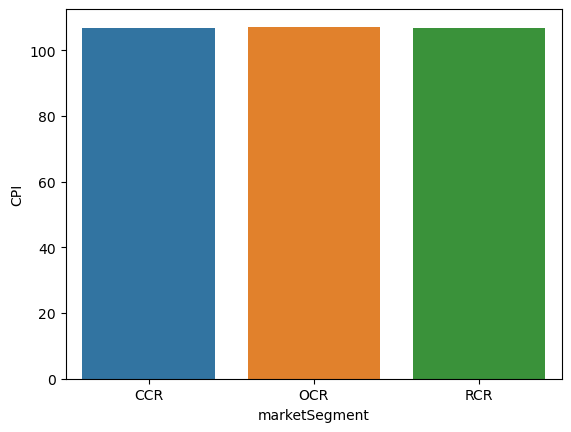

In [33]:
sns.barplot(data =mean_of_cpi, x= 'marketSegment', y = 'CPI')

### There is no relation between CPI and marketsegment

<AxesSubplot:xlabel='CPI', ylabel='price'>

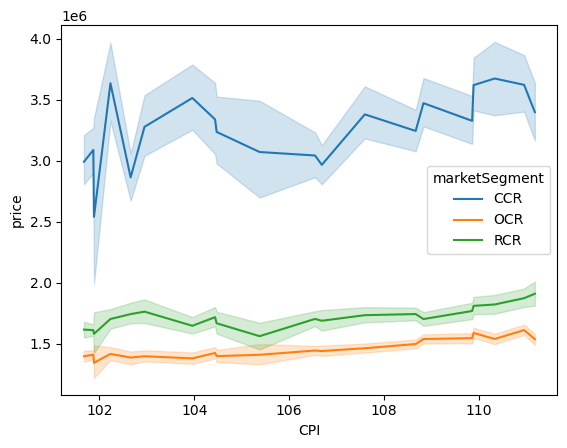

In [98]:
sns.lineplot(data = fulldf, x= 'CPI', y = 'price',hue='marketSegment')

In [34]:
sns.barplot(fulldf, x='year', y='price', hue='marketSegment')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'price'

In [22]:
x=fulldf.groupby('marketSegment')
mean=fulldf.groupby('marketSegment')[['CPI','price']].mean()
mean.to_csv('mean.csv',index=False)
mean

,CPI,price
marketSegment,,
CCR,106.734760,3.313322e+06
OCR,107.146691,1.484536e+06
RCR,106.892603,1.733864e+06


<AxesSubplot:xlabel='CPI', ylabel='price'>

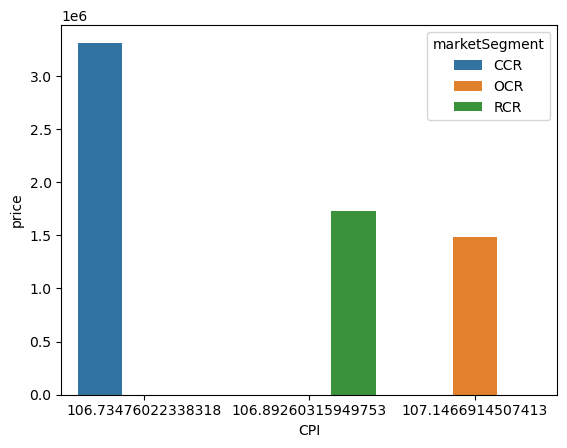

In [30]:
sns.barplot(data = mean, x= 'CPI', y = 'price',hue=mean.index)

In [35]:
sns.countplot(x='marketSegment',y='typeOfArea',data=fulldf)

ValueError: Cannot pass values for both `x` and `y`

<AxesSubplot:xlabel='marketSegment'>

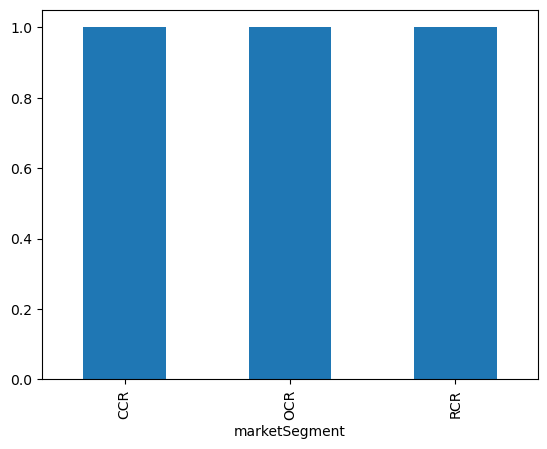

In [25]:
mean.groupby(['marketSegment']).size().plot(kind = "bar")

### Group by marketsegment

In [37]:
x=df.groupby('marketSegment')
mean_of_marketSegment=df.groupby('marketSegment')['price'].mean()
mean_of_marketSegment.to_csv('marketSegment.csv')

In [38]:
mean_of_marketSegment = pd.read_csv('marketSegment.csv')

<AxesSubplot:xlabel='marketSegment', ylabel='price'>

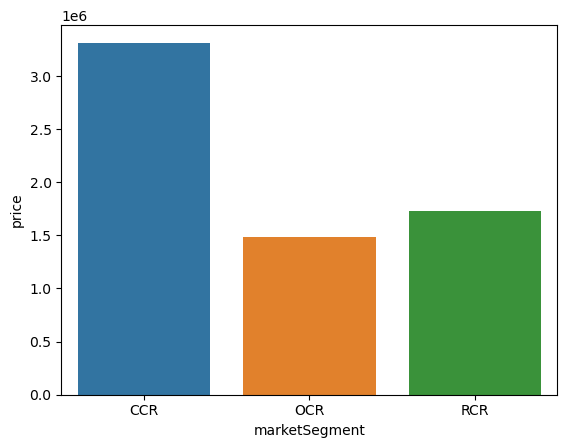

In [39]:
sns.barplot(data =mean_of_marketSegment, x= 'marketSegment', y = 'price')

<AxesSubplot:xlabel='price', ylabel='typeOfArea'>

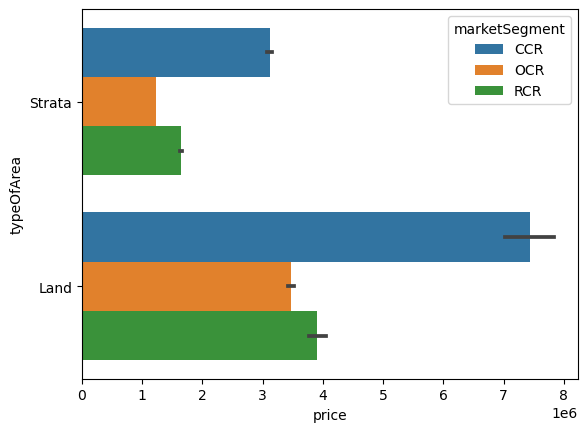

In [42]:
sns.barplot(data = fulldf, x='price',y='typeOfArea',hue='marketSegment')

### Visualize Posh district

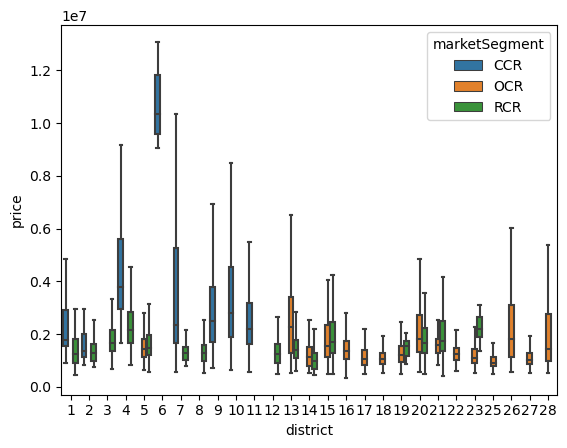

In [43]:
sns.boxplot(data=fulldf, x='district', y='price', hue='marketSegment', showfliers =False, fliersize=3)
plt.show()

### Pearson

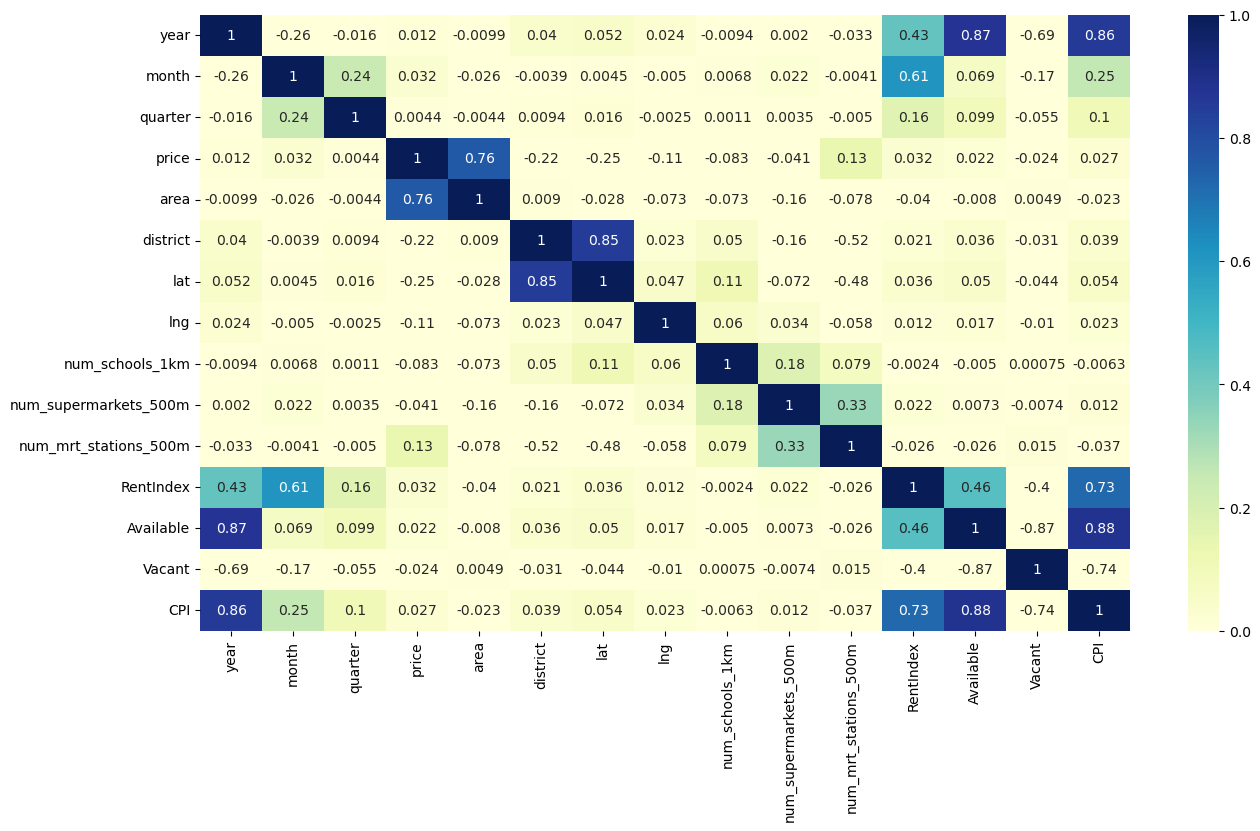

In [44]:
corr = fulldf.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu',vmax=1, vmin=0, annot=True)
plt.show()

### Visualize correlation
We can observe from the heatmap that there is a 0.76 strong positive connection between the area and the price. which implies that the size of the area increases with price. Interest rate also shows a significant positive correlation of 0.79 with year and cpi.

In [46]:
sns.lineplot(fulldf, x='Data Series', y='InterestRate')

ValueError: Could not interpret value `InterestRate` for parameter `y`

### Solving Question -[A] 1 = which region(s) underwent the sharpest price increase in the training period?

#### which region(s) underwent the sharpest price increase in the training period?  
#### Why do you think the prices in those region(s) surged relatively higher?

#### According to your prediction, which region(s) will have the highest price increase in the next three months?

### Notice that the price of CCR region is high than OCR and RCR

### Core Central Region (CCR) : 
The traditional prime areas of Singapore are comprised of the Core Central Region (CCR), commonly known as the 1, 11, 10, 9, 2, 4, and 6 districts.These districts may be seen on the Singapore district map as being where the majority of the city's posh and luxurious properties can be found.

### Rest of Central Region (RCR):
Between the low-priced condominiums in the OCR region and the high-end homes in the CCR, the RCR is regarded as the middleman,  zone in terms of pricing. RCR residences appeal to a range of buyer statistics, including empty nesters, young families, owner-occupiers, and investors.


### Outside Central Region (OCR):
There are the places which are the lowest price range are found.

### Solving Question -[A] 2 -> Why do you think the prices in those region(s) surged relatively higher?

### From EDA
More than any other location in Singapore in terms of number of supermarkets and mrt stations combined. As a result, institutions and organizations have a positive impact on people. The price will rise more rapidly the more of this institution—schools, stations, and so on—there are in a given area.

## Model

In [25]:
fulldf.isna().sum()

property_key             0
contractDate             0
year                     0
month                    0
quarter                  0
Data Series              0
price                    0
area                     0
floorRange               0
propertyType             0
district                 0
typeOfArea               0
tenure                   0
street                   0
project                  0
marketSegment            0
lat                      1
lng                      1
num_schools_1km          1
num_supermarkets_500m    1
num_mrt_stations_500m    1
RentIndex                0
Available                0
Vacant                   0
Data Series.1            0
CPI                      0
dtype: int64

In [26]:
fulldf[['lat', 'lng','num_schools_1km','num_supermarkets_500m','num_mrt_stations_500m']] = fulldf[['lat', 'lng','num_schools_1km','num_supermarkets_500m','num_mrt_stations_500m']].fillna(fulldf[['lat', 'lng','num_schools_1km','num_supermarkets_500m','num_mrt_stations_500m']].median())


In [27]:
fulldf.isna().sum()

property_key             0
contractDate             0
year                     0
month                    0
quarter                  0
Data Series              0
price                    0
area                     0
floorRange               0
propertyType             0
district                 0
typeOfArea               0
tenure                   0
street                   0
project                  0
marketSegment            0
lat                      0
lng                      0
num_schools_1km          0
num_supermarkets_500m    0
num_mrt_stations_500m    0
RentIndex                0
Available                0
Vacant                   0
Data Series.1            0
CPI                      0
dtype: int64

In [28]:
fulldf[fulldf. duplicated()]

,property_key,contractDate,year,month,quarter,Data Series,price,area,floorRange,propertyType,...,lat,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,RentIndex,Available,Vacant,Data Series.1,CPI


### Data Binning

In [50]:
cut_lables = ['small', 'medium', 'medium_large', 'large',]
cut_bins = [0, 200 , 400, 600, 1000]
fulldf['area binning'] = pd.cut(fulldf['area'], bins=cut_bins , labels=cut_lables)


In [51]:
fulldf

,property_key,contractDate,year,month,quarter,Data Series,price,area,floorRange,propertyType,...,lng,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,RentIndex,Available,Vacant,Data Series.1,CPI,area binning
0,p-c1ce31019,3/1/2018,2018,3,1,2018 1Q,1850000.0,102.0,36-40,Apartment,...,103.850553,0.0,3.0,13.0,102.8,30153,3950,2021 May,101.883,small
1,p-a7fd7deb5,3/1/2018,2018,3,1,2018 1Q,1030000.0,121.0,5-Jan,Condominium,...,103.965165,4.0,1.0,0.0,102.8,30153,3950,2021 May,101.883,small
2,p-2a981615e,3/1/2018,2018,3,1,2018 1Q,4300000.0,300.0,5-Jan,Condominium,...,103.776088,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883,medium
3,p-2bb570b5d,3/1/2018,2018,3,1,2018 1Q,1400888.0,107.0,5-Jan,Condominium,...,103.906865,6.0,0.0,2.0,102.8,30153,3950,2021 May,101.883,small
4,p-4ccd6e1db,3/1/2018,2018,3,1,2018 1Q,725000.0,54.0,10-Jun,Condominium,...,103.928528,4.0,0.0,1.0,102.8,30153,3950,2021 May,101.883,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,p-bd1f74cf3,12/1/2022,2022,12,4,2022 4Q,4630000.0,305.0,10-Jun,Condominium,...,103.837106,0.0,0.0,0.0,148.1,34084,524,2022 Dec,111.186,medium
62945,p-bf14f1df6,12/1/2022,2022,12,4,2022 4Q,1500000.0,80.0,15-Nov,Apartment,...,103.852659,0.0,1.0,11.0,148.1,34084,524,2022 Dec,111.186,small
62946,p-d32689720,12/1/2022,2022,12,4,2022 4Q,1460000.0,65.0,5-Jan,Condominium,...,103.848129,3.0,3.0,11.0,148.1,34084,524,2022 Dec,111.186,small
62947,p-1475e4b20,12/1/2022,2022,12,4,2022 4Q,1390000.0,80.0,15-Nov,Condominium,...,103.764918,2.0,1.0,0.0,148.1,34084,524,2022 Dec,111.186,small


### feature engineering data for ml model

### One hot encoding

In [52]:
onehot = pd.get_dummies(fulldf, columns=['marketSegment', 'typeOfArea', 'area binning', 'tenure' ])


### lable encoding

In [56]:
lable = LabelEncoder()
import numpy
onehot['propertyType'] = lable.fit_transform(onehot['propertyType'])
onehot['floorRange'] = lable.fit_transform(onehot['floorRange'])
onehot = onehot.drop(['Data Series.1'], axis=1)

In [58]:
df_train = onehot.copy()

In [59]:
df_train.columns

Index(['year', 'month', 'quarter', 'price', 'area', 'floorRange',
       'propertyType', 'district', 'lat', 'lng',
       ...
       'tenure_9999 yrs lease commencing from 1961',
       'tenure_9999 yrs lease commencing from 1964',
       'tenure_9999 yrs lease commencing from 1993',
       'tenure_9999 yrs lease commencing from 1995',
       'tenure_9999 yrs lease commencing from 2004',
       'tenure_999999 yrs lease commencing from 1958',
       'tenure_999999 yrs lease commencing from 1963',
       'tenure_999999 yrs lease commencing from 1990',
       'tenure_999999 yrs lease commencing from 1993', 'tenure_Freehold'],
      dtype='object', length=147)

### ML

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor



In [62]:
X = df_train.drop(['price', 'area'], axis=1)

In [63]:
y = df_train['price']

In [65]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
rf =RandomForestRegressor(n_jobs=-1, random_state=43)
rf.fit(train_x, train_y)
pre = rf.predict(test_x)
error = r2_score(test_y, pre)
print(f'r2 score -> {error}')

r2 score -> 0.8567536363495996


In [73]:
test_df=pd.read_csv('test.csv')

In [76]:
f_cols = ['property_key',
        'floorRange' ,
        'typeOfArea',
        'area',
        'propertyType', 
        'district',
       'marketSegment',
       'num_schools_1km', 
        'num_supermarkets_500m',
       'num_mrt_stations_500m',
        'tenure']
ndf = df_merged[f_cols]

NameError: name 'df_merged' is not defined

In [77]:
tdf=pd.read_csv('fulldf.csv')
tdf

,property_key,contractDate,year,month,price,area,floorRange,propertyType,district,typeOfArea,tenure,marketSegment,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,area binning
0,p-c1ce31019,3/1/2018,2018,3,1850000.0,102.0,36-40,Apartment,1,Strata,99 yrs lease commencing from 2005,CCR,0,3,13,small
1,p-a7fd7deb5,3/1/2018,2018,3,1030000.0,121.0,5-Jan,Condominium,17,Strata,Freehold,OCR,4,1,0,small
2,p-2a981615e,3/1/2018,2018,3,4300000.0,300.0,5-Jan,Condominium,10,Strata,Freehold,CCR,4,0,1,medium
3,p-2bb570b5d,3/1/2018,2018,3,1400888.0,107.0,5-Jan,Condominium,14,Strata,Freehold,OCR,6,0,2,small
4,p-4ccd6e1db,3/1/2018,2018,3,725000.0,54.0,10-Jun,Condominium,16,Strata,99 yrs lease commencing from 2009,OCR,4,0,1,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,p-bd1f74cf3,12/1/2022,2022,12,4630000.0,305.0,10-Jun,Condominium,4,Strata,99 yrs lease commencing from 2007,CCR,0,0,0,medium
62945,p-bf14f1df6,12/1/2022,2022,12,1500000.0,80.0,15-Nov,Apartment,1,Strata,99 yrs lease commencing from 2002,CCR,0,1,11,small
62946,p-d32689720,12/1/2022,2022,12,1460000.0,65.0,5-Jan,Condominium,9,Strata,99 yrs lease commencing from 2013,CCR,3,3,11,small
62947,p-1475e4b20,12/1/2022,2022,12,1390000.0,80.0,15-Nov,Condominium,5,Strata,99 yrs lease commencing from 2011,OCR,2,1,0,small


In [78]:
onehot = pd.get_dummies(tdf, columns=['marketSegment', 'typeOfArea', 'area binning', 'tenure' ])


In [80]:
lable = LabelEncoder()
import numpy
onehot['propertyType'] = lable.fit_transform(onehot['propertyType'])
onehot['floorRange'] = lable.fit_transform(onehot['floorRange'])
onehot = onehot.drop(['property_key', 'contractDate'], axis=1)

In [116]:
df=pd.read_csv('df.csv')
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\1383753072.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('df.csv')


,Unnamed: 0.1,Unnamed: 0,Unnamed: 2,price,contractDate,floorRange,area,propertyType,district,num_schools_1km,...,month,marketSegment_CCR,marketSegment_OCR,marketSegment_RCR,typeOfArea_Land,typeOfArea_Strata,area binning_small,area binning_medium,area binning_medium_large,area binning_large
0,0,0.0,NaN,1850000.0,1/1/2023,2.0,99.0,1.0,21.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1.0,NaN,1030000.0,1/1/2023,4.0,88.0,1.0,3.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,2.0,NaN,4300000.0,1/1/2023,2.0,95.0,1.0,23.0,4.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,3.0,NaN,1400888.0,1/1/2023,1.0,82.0,1.0,17.0,5.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4,4.0,NaN,725000.0,1/1/2023,4.0,95.0,3.0,22.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,62944,NaN,NaN,4630000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62945,62945,NaN,NaN,1500000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62946,62946,NaN,NaN,1460000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62947,62947,NaN,NaN,1390000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
X = df.drop(['price'], axis=1)

In [118]:
y = df['price']

In [119]:
X.head()

,Unnamed: 0.1,Unnamed: 0,Unnamed: 2,contractDate,floorRange,area,propertyType,district,num_schools_1km,num_supermarkets_500m,...,month,marketSegment_CCR,marketSegment_OCR,marketSegment_RCR,typeOfArea_Land,typeOfArea_Strata,area binning_small,area binning_medium,area binning_medium_large,area binning_large
0,0,0.0,NaN,1/1/2023,2.0,99.0,1.0,21.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1.0,NaN,1/1/2023,4.0,88.0,1.0,3.0,2.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,2.0,NaN,1/1/2023,2.0,95.0,1.0,23.0,4.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,3.0,NaN,1/1/2023,1.0,82.0,1.0,17.0,5.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4,4.0,NaN,1/1/2023,4.0,95.0,3.0,22.0,2.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [125]:

df

,price,contractDate,floorRange,propertyType,district,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,tenure,year,month,marketSegment_CCR,marketSegment_OCR,marketSegment_RCR,typeOfArea_Land,typeOfArea_Strata,area binning_small,area binning_medium,area binning_medium_large,area binning_large
0,1850000.0,1/1/2023,2.0,1.0,21.0,2.0,0.0,1.0,43.0,2023.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1030000.0,1/1/2023,4.0,1.0,3.0,2.0,1.0,1.0,60.0,2023.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,4300000.0,1/1/2023,2.0,1.0,23.0,4.0,0.0,2.0,47.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1400888.0,1/1/2023,1.0,1.0,17.0,5.0,0.0,0.0,121.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,725000.0,1/1/2023,4.0,3.0,22.0,2.0,2.0,0.0,65.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,4630000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62945,1500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62946,1460000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62947,1390000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [127]:
rf = RandomForestRegressor(n_jobs=-1, random_state=41)
rf.fit(train_x, train_y)
pre = rf.predict(test_x)
error = r2_score(test_y, pre)
print(f'r2 score -> {error}')

ValueError: could not convert string to float: '3/1/2023'

In [128]:
def contract_year_month(df):
    
    data = df['contractDate'].values
    years, months , datetime= [], [], []
    for i in data:
        year, month, _ = i.split('-')
        years.append(int(year))
        datetime.append(pd.to_datetime(i))
        months.append(int(month))
    return [years, months, datetime]

In [133]:
def convert_dataseries_datetime(df):
    
#     months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data = df['contractDate'].values
    month_arr = []
    years = []
    datetime = []

    for i in data:
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        year, mon, _ = i.split('/')
        month = months.index(mon) + 1
        date = f'{year}-{month}-01'
        date = pd.to_datetime(date)
        
        datetime.append(date)
        years.append(int(year))
        month_arr.append(month)
    
    return [datetime, years, month_arr]


In [134]:
datetime, years, months = convert_dataseries_datetime(df)
df['contractDate'] = datetime
df['year'] = years
df['month']= months
df.info()

ValueError: '1' is not in list

In [132]:
df

,price,contractDate,floorRange,propertyType,district,num_schools_1km,num_supermarkets_500m,num_mrt_stations_500m,tenure,year,month,marketSegment_CCR,marketSegment_OCR,marketSegment_RCR,typeOfArea_Land,typeOfArea_Strata,area binning_small,area binning_medium,area binning_medium_large,area binning_large
0,1850000.0,1/1/2023,2.0,1.0,21.0,2.0,0.0,1.0,43.0,2023.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1030000.0,1/1/2023,4.0,1.0,3.0,2.0,1.0,1.0,60.0,2023.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,4300000.0,1/1/2023,2.0,1.0,23.0,4.0,0.0,2.0,47.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1400888.0,1/1/2023,1.0,1.0,17.0,5.0,0.0,0.0,121.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,725000.0,1/1/2023,4.0,3.0,22.0,2.0,2.0,0.0,65.0,2023.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62944,4630000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62945,1500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62946,1460000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62947,1390000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
